In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import os 

In [2]:
workdir = os.getcwd();
DataDir = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\DataSets'
Graph_Str = r'C:\Users\noaht\Documents\Intro To ML\INTRO_TO_ML_REPO\HW1_LinearRegHousing\HW1_Graphs'


In [3]:
df = pd.read_csv(DataDir + '/Housing.csv')

In [4]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  m = len(y)
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [5]:

def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)   
  """ 
  theta_history = np.array((iterations, len(theta)))
  X = pd.concat([pd.Series(1, index=X.index, name='x_0'), X], axis=1)
  print(X.head())
  m = len(y)
  cost_history = np.zeros(iterations) 
  theta_history = np.zeros((iterations, theta.shape[1]))
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    theta_history[i] = theta 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

# Clensing of the Data 

In [6]:
print(df.dtypes)
df.head()

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
def catToUseful(df):
    newDf = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):

        if types[i] == 'object' or types[i] == 'str':
            newDf[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            newDf[col[i]] = df[col[i]]
    return newDf

In [8]:
# use standardScalar and normilization 
#  normal example preprocessing.Normalizer().fit(X)  
#  statdard example  preprocessing.StandardScaler().fit(X_train)
def standardize(df):
    # Standardization
    col = df.columns
    scale = preprocessing.StandardScaler().fit(df)
    df[col] = scale.transform(df[col]) 
    return df

def normalize(df):
    col = df.columns
    norm = preprocessing.Normalizer().fit(df)
    df[col] = norm.transform(df[col]) 
    return df 

In [9]:
# gather data 
df = catToUseful(df)
X_val = df.drop(columns = 'price')
Y_val = df['price']
df_p2 = normalize(standardize(df))
X_val2 = df_p2.drop(columns = 'price')
Y_val2 = df_p2['price']

In [10]:
# split data 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_val, Y_val, test_size = .2, random_state = 69)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_val2, Y_val2, test_size = .2, random_state = 69)

In [11]:
Y_train2

445   -0.231070
181    0.064488
130    0.176081
296   -0.125819
38     0.369145
         ...   
278   -0.085424
404   -0.208855
439   -0.218812
203    0.032696
54     0.397076
Name: price, Length: 436, dtype: float64

In [12]:
# 1 Develop gradient for these Columns: 
# area, bedrooms, bathrooms, stories, parking

# 2 Develop gradient for these columns: 
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [13]:
# Define Variables
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
col_p2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_train1_1 = X_train1[col_p1]
X_train1_2 = X_train1[col_p2] 
theta = np.array([0]*(len(X_train1_1.columns)+1))
alpha = .01 
iterations = 500 

array([500,   6])

In [14]:
theta.shape[0]

6

In [15]:
model, cost_func = gradient_descent(X_train1_1, Y_train1, theta, .000000001, iterations)

     x_0  area  bedrooms  bathrooms  stories  parking
445    1  3450         1          1        1        0
181    1  7200         3          1        2        1
130    1  4800         3          1        1        0
296    1  4600         3          2        2        1
38     1  6000         3          1        4        2


IndexError: tuple index out of range

In [ ]:
model

x_0               -2.577764e-08
area               1.611436e-06
bedrooms          -4.520187e-08
bathrooms         -1.847083e-09
stories           -4.709643e-09
mainroad          -1.139260e-08
guestroom          8.955068e-09
basement           2.713048e-09
hotwaterheating    4.499435e-10
airconditioning    2.017628e-08
parking            1.680898e-08
prefarea           1.126510e-08
dtype: float64

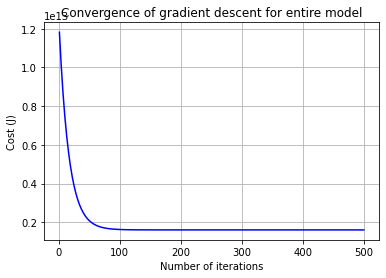

In [ ]:
plt.plot(range(1, iterations + 1),cost_func, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent for entire model')
plt.savefig('convergence_part2.jpg') 
